# Задание 8

## 1. Wiki philosophy (0.5 баллов)
Существует шуточный «закон Философии» для статей Википедии: если переходить по
первой нормальной ссылке в статье, то рано или поздно мы придем на статью о философии.
Ваша задача заключается в том, чтобы проверить этот закон.
Для этого нужно написать программу, которая получает на вход ссылку на статью Википедии, а потом циклически переходит по первой нормальной ссылке и повторяет эту операцию
(до тех пор, пока не будет достигнута статья о философии, или ссылки не зациклятся). Нормальной ссылкой будем называть ссылку, которая находится в основном содержании статьи,
не в инфобоксах и не в служебных блоках, написана синим цветом (красный соответствует
несуществующей статье), не курсивом, не являтся сноской и не находится в скобках.

<b>Результат</b> должен представлять из себя несколько статистик (проверьте не менее 100 стр., <i>больше - лучше</i>):
* Описание алгоритма, как вы решали, стр. по философии или нет?
* Количество начальных ссылок vs Количество конечных тем страниц (0 - стр. не по философии, 1 - по философии).
* Гистограмма длин путей.
* Соотношений успешных и неуспешных запросов.
* Что еще можно тут придумать? :)

<b>Обратите внимание</b>, что для проверки нормальности не обязательно разбирать таблицы стилей и
проверять цвет и т.п., достаточно сделать, чтобы программа работала для текущей верстки
википедии (например, можно использовать атрибут class у тегов).
Для удобства проверки сделайте, чтобы последовательность переходов выводилась на
экран.

<b>Внимание.</b> Чтобы не создавать большую нагрузку на сервер Википедии, сделайте так,
чтобы ваша программа делала не более 2-х запросов в секунду. Для этого воспользуйтесь
функцией sleep из модуля time.

<b>PS</b> Лучше выполнять не в ipython notebook, а прислать отчет в pdf и код.

In [1]:
from requests import get, post
import urllib
import urllib.parse
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import time
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

In [2]:
def getValidRef(soup):
    for li in soup.findAll(attrs={'class':'mw-parser-output'}):
        text = li.find_all('p')
        for part in text:
            for remove in part('i'):
                remove.extract()
                
            links = part.find_all('a')
            for link in links:                    
                if link.has_attr('class') and link['class'] == 'new':
                    continue
                    
                if not link.has_attr('title') or 'Help:' in link['title'] or 'Wikipedia:Media' in link['title']:
                    continue
#                 '(' + str(link) + ')' not in str(link.parent) and link['href'][-4:] != '.ogg'
                
                if re.search('[^\)]*\([^\)]*' + str(link['title']) + '[^\)]*\)', str(part)) is None:
                    return link['title']
                
        return None

In [3]:
def isPhilosophical(soup):
    cat = soup.find(attrs={'title':'Category:Philosophy'})
    return cat is not None

In [4]:
def google(query, history):
    template = 'https://en.wikipedia.org/wiki/'
    print(query)
    req = get(template + query)
    
    assert req.status_code == 200, 'request failed'
    
    soup = BeautifulSoup(req.text, "lxml")
    if isPhilosophical(soup):
        print('Succes!', query)
        return 1, len(history)
    
    ref = getValidRef(soup)
    if ref is None:
        print('no links!')
        return 0, 0
    
    if ref in history:
        print(ref)
        print('cycle!')
        return 0, 0
    
    time.sleep(0.5)
#     print(ref)
    history.append(query)
    return google(ref, history)

In [5]:
google('Alappuzha_district', [])

Alappuzha_district
Districts of Kerala
India
South Asia
South
Cardinal direction
North
Compass points
Compass
Navigation
Term of art
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge
Succes! Knowledge


(1, 18)

In [6]:
success = 0
length = []
for i in tqdm(range(100)):
    res = google('Special:Random', [])
    success += res[0]
    if res[0] != 0:
        length.append(res[1])

  0%|          | 0/100 [00:00<?, ?it/s]

Special:Random
Western Australia
States and territories of Australia
Federal territory
Federated state
Constitution
State (polity)
Political
Decision-making
Psychology
Science
Knowledge


  1%|          | 1/100 [00:13<21:40, 13.14s/it]

Succes! Knowledge
Special:Random
Somerset County, Pennsylvania
County (United States)
Administrative division
Country
Political geography
Politics
Decision-making
Psychology
Science
Knowledge


  2%|▏         | 2/100 [00:24<19:42, 12.06s/it]

Succes! Knowledge
Special:Random
Moth
Insect
Hexapoda


  3%|▎         | 3/100 [00:27<14:57,  9.25s/it]

Insect
cycle!
Special:Random
Peace and Democracy Party
List of political parties in Turkey
Turkey
List of transcontinental countries
Continent
Land
Earth
Planet
Astronomical body
Physical body
Physics
Romanization of Ancient Greek
Transliteration
Conversion of scripts
Writing system
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


  4%|▍         | 4/100 [00:51<20:29, 12.81s/it]

Succes! Knowledge
Special:Random
University of Northampton
Public university
University
Educational institution
Institution
Social structure
Social science
Discipline (academia)
Branch (academia)
Knowledge


  5%|▌         | 5/100 [01:01<19:36, 12.39s/it]

Succes! Knowledge
Special:Random
Districts of Peru
District
Administrative division
Country
Political geography
Politics
Decision-making
Psychology
Science
Knowledge


  6%|▌         | 6/100 [01:12<19:01, 12.14s/it]

Succes! Knowledge
Special:Random
1927 in music


  7%|▋         | 7/100 [01:15<16:45, 10.81s/it]

no links!
Special:Random
Middle-distance running
Track and field
Sport
Competition
Territory (animal)
Ethology
Scientific method
OxfordDictionaries.com
List of online dictionaries
Dictionary
Word
Linguistics
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


  8%|▊         | 8/100 [01:37<18:45, 12.23s/it]

Succes! Knowledge
Special:Random
Whey
Milk
Mammary gland
Exocrine gland
Gland
Blood
Body fluid
Liquid
Compressibility
Thermodynamics
Physics
Romanization of Ancient Greek
Transliteration
Conversion of scripts
Writing system
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


  9%|▉         | 9/100 [02:01<20:26, 13.48s/it]

Succes! Knowledge
Special:Random
Communes of France
Métropole
Communauté urbaine


 10%|█         | 10/100 [02:04<18:43, 12.48s/it]

Métropole
cycle!
Special:Random
Peanut
Taxonomy (biology)
Science
Knowledge


 11%|█         | 11/100 [02:09<17:31, 11.82s/it]

Succes! Knowledge
Special:Random
Germany
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 12%|█▏        | 12/100 [02:18<16:58, 11.57s/it]

Mathematics
cycle!
Special:Random
John White (composer)
English people
Nation
Community
Norm (social)
Sociology
Society
Social group
Social science
Discipline (academia)
Branch (academia)
Knowledge


 13%|█▎        | 13/100 [02:32<16:58, 11.71s/it]

Succes! Knowledge
Special:Random
Districts of Peru
District
Administrative division
Country
Political geography
Politics
Decision-making
Psychology
Science
Knowledge


 14%|█▍        | 14/100 [02:42<16:41, 11.64s/it]

Succes! Knowledge
Special:Random
Olivier Award
Society of London Theatre
West End theatre
Theatre
Fine art
Aesthetics


 15%|█▌        | 15/100 [02:49<16:03, 11.33s/it]

Succes! Aesthetics
Special:Random
Types of inhabited localities in Russia
Human settlement
Geography
Science
Knowledge


 16%|█▌        | 16/100 [02:55<15:22, 10.99s/it]

Succes! Knowledge
Special:Random
United States
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 17%|█▋        | 17/100 [03:05<15:05, 10.91s/it]

Mathematics
cycle!
Special:Random
Magical girl
Genre
Category of being
Ontology


 18%|█▊        | 18/100 [03:10<14:26, 10.56s/it]

Succes! Ontology
Special:Random
Heavy metal music
Rock music
Popular music
Music industry
Musical composition
Song
Melody
Linearity
Line (geometry)
Postulate
Truth


 19%|█▉        | 19/100 [03:23<14:27, 10.71s/it]

Succes! Truth
Special:Random
Home care
Home
Family
Human
Extinct
Biology
Natural science
Science
Knowledge


 20%|██        | 20/100 [03:34<14:16, 10.70s/it]

Succes! Knowledge
Special:Random
Bob Mair
Bass (guitar)
String instrument
String (music)
Vibrating string
Vibration
Oscillation
Time
Sequence
Mathematics
Quantity
Counting
Element (mathematics)


 21%|██        | 21/100 [03:48<14:19, 10.87s/it]

Mathematics
cycle!
Special:Random
Professional athletes
Amateur sports
Sport
Competition
Territory (animal)
Ethology
Scientific method
OxfordDictionaries.com
List of online dictionaries
Dictionary
Word
Linguistics
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 22%|██▏       | 22/100 [04:09<14:44, 11.34s/it]

Succes! Knowledge
Special:Random
Butterfly
Insect
Hexapoda


 23%|██▎       | 23/100 [04:13<14:07, 11.01s/it]

Insect
cycle!
Special:Random
Victoria (Australia)
States and territories of Australia
Federal territory
Federated state
Constitution
State (polity)
Political
Decision-making
Psychology
Science
Knowledge


 24%|██▍       | 24/100 [04:25<14:00, 11.06s/it]

Succes! Knowledge
Special:Random
KatGames
Doing business as
Pseudonym
Name
Term (language)
Word
Linguistics
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 25%|██▌       | 25/100 [04:41<14:03, 11.24s/it]

Succes! Knowledge
Special:Random
Sheryn Regis
Philippines
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 26%|██▌       | 26/100 [04:51<13:50, 11.22s/it]

Mathematics
cycle!
Special:Random
Channel Islands (California)
Archipelago
Island
Continent
Land
Earth
Planet
Astronomical body
Physical body
Physics
Romanization of Ancient Greek
Transliteration
Conversion of scripts
Writing system
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 27%|██▋       | 27/100 [05:15<14:13, 11.69s/it]

Succes! Knowledge
Special:Random
Procurer
Prostitute
Sexual activity
Human sexuality
Human sexual activity


 28%|██▊       | 28/100 [05:23<13:51, 11.55s/it]

Human sexuality
cycle!
Special:Random
Soccer
Team sport
Sport
Competition
Territory (animal)
Ethology
Scientific method
OxfordDictionaries.com
List of online dictionaries
Dictionary
Word
Linguistics
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 29%|██▉       | 29/100 [05:44<14:03, 11.88s/it]

Succes! Knowledge
Special:Random
Masvingo Province
Provinces of Zimbabwe
Zimbabwe
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 30%|███       | 30/100 [05:56<13:51, 11.87s/it]

Mathematics
cycle!
Special:Random
Moth
Insect
Hexapoda


 31%|███       | 31/100 [06:00<13:23, 11.64s/it]

Insect
cycle!
Special:Random
United States Post Office Department
United States Postal Service
Independent agencies of the United States government
Federal government of the United States
Central government
Government
State (polity)
Political
Decision-making
Psychology
Science
Knowledge


 32%|███▏      | 32/100 [06:14<13:15, 11.70s/it]

Succes! Knowledge
Special:Random
Cricket
Bat-and-ball games
Playing field
Sport
Competition
Territory (animal)
Ethology
Scientific method
OxfordDictionaries.com
List of online dictionaries
Dictionary
Word
Linguistics
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 33%|███▎      | 33/100 [06:35<13:23, 12.00s/it]

Succes! Knowledge
Special:Random
Bahamas
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 34%|███▍      | 34/100 [06:44<13:04, 11.89s/it]

Mathematics
cycle!
Special:Random
Gridiron football
Football
Team sport
Sport
Competition
Territory (animal)
Ethology
Scientific method
OxfordDictionaries.com
List of online dictionaries
Dictionary
Word
Linguistics
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 35%|███▌      | 35/100 [07:05<13:10, 12.16s/it]

Succes! Knowledge
Special:Random
Kushk-e Qazi Rural District
Rural Districts of Iran
Administrative divisions of Iran
Country subdivision
Country
Political geography
Politics
Decision-making
Psychology
Science
Knowledge


 36%|███▌      | 36/100 [07:17<12:57, 12.14s/it]

Succes! Knowledge
Special:Random
Moth
Insect
Hexapoda


 37%|███▋      | 37/100 [07:21<12:30, 11.92s/it]

Insect
cycle!
Special:Random
National Register of Historic Places
United States federal government
Central government
Government
State (polity)
Political
Decision-making
Psychology
Science
Knowledge


 38%|███▊      | 38/100 [07:32<12:17, 11.90s/it]

Succes! Knowledge
Special:Random
Country music
Southern United States
Dixie


 39%|███▉      | 39/100 [07:37<11:54, 11.72s/it]

Southern United States
cycle!
Special:Random
United States
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 40%|████      | 40/100 [07:46<11:39, 11.65s/it]

Mathematics
cycle!
Special:Random
Companion of the Order of Australia
Order (honour)
Honour
Family
Human
Extinct
Biology
Natural science
Science
Knowledge


 41%|████      | 41/100 [07:58<11:27, 11.66s/it]

Succes! Knowledge
Special:Random
Sri Lanka
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 42%|████▏     | 42/100 [08:07<11:12, 11.60s/it]

Mathematics
cycle!
Special:Random
GTV (Australia)
Television station
Amateur television
Broadcast quality
Videotape
Magnetic tape
Magnetic recording
Data
Set (mathematics)
Mathematics
Quantity
Counting
Element (mathematics)


 43%|████▎     | 43/100 [08:20<11:03, 11.65s/it]

Mathematics
cycle!
Special:Random
Hilal-i-Pakistan
Independence
Nation
Community
Norm (social)
Sociology
Society
Social group
Social science
Discipline (academia)
Branch (academia)
Knowledge


 44%|████▍     | 44/100 [08:32<10:52, 11.66s/it]

Succes! Knowledge
Special:Random
Cupressaceae
Conifer
Cordaitales
Cordaitaceae
Family (biology)
Biological classification
Science
Knowledge


 45%|████▌     | 45/100 [08:41<10:37, 11.60s/it]

Succes! Knowledge
Special:Random
National Football League
American football
Offense (sports)
Goal (sport)
Sport
Competition
Territory (animal)
Ethology
Scientific method
OxfordDictionaries.com
List of online dictionaries
Dictionary
Word
Linguistics
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 46%|████▌     | 46/100 [09:04<10:39, 11.85s/it]

Succes! Knowledge
Special:Random
Canadians
Canada
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 47%|████▋     | 47/100 [09:14<10:25, 11.80s/it]

Mathematics
cycle!
Special:Random
India
South Asia
South
Cardinal direction
North
Compass points
Compass
Navigation
Term of art
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 48%|████▊     | 48/100 [09:33<10:20, 11.94s/it]

Succes! Knowledge
Special:Random
Gymnast
Strength training
Physical exercise
Physical fitness
Health
World Health Organization
List of specialized agencies of the United Nations
United Nations
Intergovernmental organization
Organization
Entity
Existence


 49%|████▉     | 49/100 [09:46<10:10, 11.97s/it]

Succes! Existence
Special:Random
Albanians
Islam
Abrahamic religions
Semitic people
Semitic languages
Afroasiatic languages
Language family
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 50%|█████     | 50/100 [10:04<10:04, 12.09s/it]

Succes! Knowledge
Special:Random
Khvosh Rud Rural District
Rural Districts of Iran
Administrative divisions of Iran
Country subdivision
Country
Political geography
Politics
Decision-making
Psychology
Science
Knowledge


 51%|█████     | 51/100 [10:16<09:52, 12.09s/it]

Succes! Knowledge
Special:Random
Japan Airlines
Flag carrier
Transport
Cargo
Economics
Social science
Discipline (academia)
Branch (academia)
Knowledge


 52%|█████▏    | 52/100 [10:27<09:39, 12.07s/it]

Succes! Knowledge
Special:Random
Bulgaria
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 53%|█████▎    | 53/100 [10:36<09:24, 12.01s/it]

Mathematics
cycle!
Special:Random
Football (soccer)
Team sport
Sport
Competition
Territory (animal)
Ethology
Scientific method
OxfordDictionaries.com
List of online dictionaries
Dictionary
Word
Linguistics
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 54%|█████▍    | 54/100 [10:56<09:19, 12.17s/it]

Succes! Knowledge
Special:Random
Dynamical system
Mathematics
Quantity
Counting
Element (mathematics)


 55%|█████▌    | 55/100 [11:02<09:01, 12.04s/it]

Mathematics
cycle!
Special:Random
Germany
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 56%|█████▌    | 56/100 [11:10<08:47, 11.98s/it]

Mathematics
cycle!
Special:Random
Israel
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 57%|█████▋    | 57/100 [11:19<08:32, 11.93s/it]

Mathematics
cycle!
Special:Random
Irish people
Irish Travellers
Itinerant groups in Europe
Gypsy (term)
Romani people


 58%|█████▊    | 58/100 [11:26<08:17, 11.84s/it]

Itinerant groups in Europe
cycle!
Special:Random
France
Europe
Continent
Land
Earth
Planet
Astronomical body
Physical body
Physics
Romanization of Ancient Greek
Transliteration
Conversion of scripts
Writing system
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 59%|█████▉    | 59/100 [11:48<08:12, 12.01s/it]

Succes! Knowledge
Special:Random
Australian rules football
Contact sport
Sport
Competition
Territory (animal)
Ethology
Scientific method
OxfordDictionaries.com
List of online dictionaries
Dictionary
Word
Linguistics
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 60%|██████    | 60/100 [12:09<08:06, 12.16s/it]

Succes! Knowledge
Special:Random
Reproductive physiology
Subspecialty
Specialty (medicine)
Medicine
Science
Knowledge


 61%|██████    | 61/100 [12:17<07:51, 12.08s/it]

Succes! Knowledge
Special:Random
United States Army
United States Department of Defense
United States federal executive departments
Executive branch of the United States government
Central government
Government
State (polity)
Political
Decision-making
Psychology
Science
Knowledge


 62%|██████▏   | 62/100 [12:30<07:39, 12.10s/it]

Succes! Knowledge
Special:Random
Historian
Recorded history
History
George Santayana
Man of letters
Critical thinking
Objectivity (philosophy)


 63%|██████▎   | 63/100 [12:38<07:25, 12.04s/it]

Succes! Objectivity (philosophy)
Special:Random
Osijek-Baranja County
Croatian language
Standard language
Variety (linguistics)
Sociolinguistics
Society
Social group
Social science
Discipline (academia)
Branch (academia)
Knowledge


 64%|██████▍   | 64/100 [12:50<07:13, 12.04s/it]

Succes! Knowledge
Special:Random


 65%|██████▌   | 65/100 [12:50<06:54, 11.86s/it]

no links!
Special:Random
Beetle
Insect
Hexapoda


 66%|██████▌   | 66/100 [12:55<06:39, 11.75s/it]

Insect
cycle!
Special:Random


 67%|██████▋   | 67/100 [12:55<06:22, 11.58s/it]

no links!
Special:Random
Barognosis
Skill
Departmentalization
Division of labour
System
Latin
Classical language
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 68%|██████▊   | 68/100 [13:12<06:12, 11.65s/it]

Succes! Knowledge
Special:Random
Michigan Senate
Upper house
Senate
Deliberative assembly
Parliamentary procedure
Procedural law
Court
Tribunal
Institution
Social structure
Social science
Discipline (academia)
Branch (academia)
Knowledge


 69%|██████▉   | 69/100 [13:26<06:02, 11.69s/it]

Succes! Knowledge
Special:Random
Colombia
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 70%|███████   | 70/100 [13:35<05:49, 11.65s/it]

Mathematics
cycle!
Special:Random
Prison security categories in the United Kingdom
United Kingdom
Europe
Continent
Land
Earth
Planet
Astronomical body
Physical body
Physics
Romanization of Ancient Greek
Transliteration
Conversion of scripts
Writing system
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 71%|███████   | 71/100 [14:00<05:43, 11.84s/it]

Succes! Knowledge
Special:Random
NŠ Drava Ptuj
Slovenia
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 72%|███████▏  | 72/100 [14:10<05:30, 11.81s/it]

Mathematics
cycle!
Special:Random
American football
Offense (sports)
Goal (sport)
Sport
Competition
Territory (animal)
Ethology
Scientific method
OxfordDictionaries.com
List of online dictionaries
Dictionary
Word
Linguistics
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 73%|███████▎  | 73/100 [14:31<05:22, 11.94s/it]

Succes! Knowledge
Special:Random
Nova Scotia
Canada
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 74%|███████▍  | 74/100 [14:41<05:09, 11.91s/it]

Mathematics
cycle!
Special:Random
Occitan language
French language
Romance languages
Vulgar Latin
Sociolect
Sociolinguistics
Society
Social group
Social science
Discipline (academia)
Branch (academia)
Knowledge


 75%|███████▌  | 75/100 [14:56<04:58, 11.95s/it]

Succes! Knowledge
Special:Random
Audiobook
Abridgement
Tone (literature)
Literature
Writing
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 76%|███████▌  | 76/100 [15:08<04:46, 11.95s/it]

Succes! Knowledge
Special:Random
County (United States)
Administrative division
Country
Political geography
Politics
Decision-making
Psychology
Science
Knowledge


 77%|███████▋  | 77/100 [15:18<04:34, 11.92s/it]

Succes! Knowledge
Special:Random
Overture
Music
Culture
Social behavior
Behavior
Action (philosophy)
Philosophy


 78%|███████▊  | 78/100 [15:25<04:21, 11.86s/it]

Succes! Philosophy
Special:Random
Perth, Western Australia
List of Australian capital cities
Australia
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 79%|███████▉  | 79/100 [15:37<04:09, 11.87s/it]

Mathematics
cycle!
Special:Random
Netherlands
Europe
Continent
Land
Earth
Planet
Astronomical body
Physical body
Physics
Romanization of Ancient Greek
Transliteration
Conversion of scripts
Writing system
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 80%|████████  | 80/100 [16:00<04:00, 12.01s/it]

Succes! Knowledge
Special:Random
Estonia
Europe
Continent
Land
Earth
Planet
Astronomical body
Physical body
Physics
Romanization of Ancient Greek
Transliteration
Conversion of scripts
Writing system
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 81%|████████  | 81/100 [16:23<03:50, 12.15s/it]

Succes! Knowledge
Special:Random
Enid Blyton
List of children's literature authors
Children's literature
Oral tradition
Oral history
Interview
Conversation
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 82%|████████▏ | 82/100 [16:39<03:39, 12.19s/it]

Succes! Knowledge
Special:Random
Owatonna, Minnesota
Steele County, Minnesota
County (United States)
Administrative division
Country
Political geography
Politics
Decision-making
Psychology
Science
Knowledge


 83%|████████▎ | 83/100 [16:52<03:27, 12.20s/it]

Succes! Knowledge
Special:Random
American Broadcasting Company
Commercial broadcasting
Broadcasting
Distribution (business)
Marketing mix
Marketing
Management
Administration (disambiguation)


 84%|████████▍ | 84/100 [17:01<03:14, 12.16s/it]

no links!
Special:Random
FT Alphaville
Financial market
Market (economics)
System
Latin
Classical language
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 85%|████████▌ | 85/100 [17:15<03:02, 12.19s/it]

Succes! Knowledge
Special:Random
Operational transconductance amplifier
Amplifier
Power (physics)
Work (physics)
Force (physics)
Physics
Romanization of Ancient Greek
Transliteration
Conversion of scripts
Writing system
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 86%|████████▌ | 86/100 [17:34<02:51, 12.26s/it]

Succes! Knowledge
Special:Random
Companions of the Order of Australia
Order of Australia
Order (honour)
Honour
Family
Human
Extinct
Biology
Natural science
Science
Knowledge


 87%|████████▋ | 87/100 [17:48<02:39, 12.28s/it]

Succes! Knowledge
Special:Random
Poles
Nation
Community
Norm (social)
Sociology
Society
Social group
Social science
Discipline (academia)
Branch (academia)
Knowledge


 88%|████████▊ | 88/100 [18:01<02:27, 12.29s/it]

Succes! Knowledge
Special:Random
Puerto Rico
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


 89%|████████▉ | 89/100 [18:11<02:14, 12.27s/it]

Mathematics
cycle!
Special:Random
Governor of California
Head of government
Sovereign state
International law
State (polity)
Political
Decision-making
Psychology
Science
Knowledge


 90%|█████████ | 90/100 [18:24<02:02, 12.27s/it]

Succes! Knowledge
Special:Random
Peer-reviewed
Field of study
Branch (academia)
Knowledge


 91%|█████████ | 91/100 [18:29<01:49, 12.19s/it]

Succes! Knowledge
Special:Random
Philatelist
Postage stamp
Mail
Postcard
Card stock
Paperboard
Paper
Fibre
Natural fiber


 92%|█████████▏| 92/100 [18:38<01:37, 12.16s/it]

Fibre
cycle!
Special:Random
Clark University
Private university
Tax breaks
Tax avoidance
Tax
Direct tax


 93%|█████████▎| 93/100 [18:46<01:24, 12.11s/it]

Tax
cycle!
Special:Random
Military Cross and Bar
Military decoration
Medal
Jewellery
Adornment
Beauty
Idea
Philosophy


 94%|█████████▍| 94/100 [18:55<01:12, 12.08s/it]

Succes! Philosophy
Special:Random
T'ai chi ch'uan
Neijia
Chinese martial arts
Umbrella term
Categorization
Binary relation
Mathematics
Quantity
Counting
Element (mathematics)


 95%|█████████▌| 95/100 [19:07<01:00, 12.08s/it]

Mathematics
cycle!
Special:Random
Cavalier
Roundhead
Parliament of England
Legislature
Deliberative assembly
Parliamentary procedure
Procedural law
Court
Tribunal
Institution
Social structure
Social science
Discipline (academia)
Branch (academia)
Knowledge


 96%|█████████▌| 96/100 [19:21<00:48, 12.10s/it]

Succes! Knowledge
Special:Random
First-class cricket
Cricket
Bat-and-ball games
Playing field
Sport
Competition
Territory (animal)
Ethology
Scientific method
OxfordDictionaries.com
List of online dictionaries
Dictionary
Word
Linguistics
Language
Communication
Meaning (semiotics)
Semiotics
Meaning-making
Psychology
Science
Knowledge


 97%|█████████▋| 97/100 [19:44<00:36, 12.21s/it]

Succes! Knowledge
Special:Random
Shaivism
Shiva
Hindu deities
Deva (Hinduism)
Deity
Supernatural
Physical law
Scientific theory
Reproducibility
Measurements
Natural sciences
Science
Knowledge


 98%|█████████▊| 98/100 [19:59<00:24, 12.24s/it]

Succes! Knowledge
Special:Random


 99%|█████████▉| 99/100 [20:00<00:12, 12.12s/it]

no links!
Special:Random
Gmina Rudna
Gmina
Poland
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Counting
Element (mathematics)


100%|██████████| 100/100 [20:11<00:00, 12.11s/it]

Mathematics
cycle!


In [7]:
success

63

Проверка на то, что статья о философии - философия в категории

In [8]:
success/100

0.63

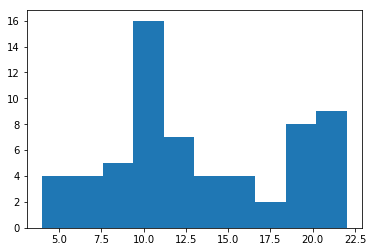

In [9]:
plt.hist(length)
plt.show()

## 2. Books lib (0.5 баллов)
Напишите сайт-библиотеку для книг. Он должен удовлетворять следующему функционалу:
* Иметь одну главную страницу со списком авторов и ниже их произведений.
* Можно кликнуть на автора и получить список его произведений на отдельной стр.
* Можно кликнуть на книгу и получить текст книги на отдельной стр.
* Оформление и улучшение функционала приветствуются. Но можно обойтись заголовками и ссылками.

<b>Особенности реализации</b>:
* Список книг и авторов заранее не задан и должен быть создан автоматически. (<i>как - понятно из следующего описания</i>)
* Все книги хранятся по каталогам, которые имеют имя автора.
* Каждая книга имеет название, которое и будет показано в ссылке.
* Архив с книгами в папке с заданием (books.zip).
* Плюсом будет, если вы "замайните" книги, вместо использования готового архива (+0.2 балла).
* Использовать flask и bootstrap стили.

<b>PS</b> Лучше выполнять не в ipython notebook, а прислать отчет в pdf и код.